### **DATA MINING FINAL PROJECT – Customer Loyalty Prediction**

---

### Group       :   **Powerpuff Girls Group**

Members     :   
- Sekarlintang Khairilaracelli Laveva Ken Handita 102022340251
- Maurithania Joleesha Maria Tjakra               102022340119
- Gia Putri Pratiwi                               102022340192

Class       :   SI47INT

---

### **📄 Dataset Information**

The dataset used in this project contains information about customer purchasing behaviors from a retail business. It aims to understand customer loyalty patterns and purchasing habits through clustering and predictive modeling. The dataset includes key customer attributes such as:

- **Customer ID** : Unique identifier for each customer
- **Gender** : Customer's gender
- **Age** : Customer's age
- **Annual Income** : Total income of the customer per year
- **Purchase Amount** : Total spending amount by the customer
- **Purchase Frequency** : Number of times the customer made a purchase
- **Loyalty Score** : Score from 1 to 10 representing how loyal the customer is

The goal is to use K-Means Clustering to group similar customers based on behavior, and use Logistic Regression to predict whether a customer is loyal or not loyal.

An interactive dashboard was also built using Streamlit, allowing users to:

* Visualize customer clusters and loyalty segments
* Input new customer data and get real-time predictions of loyalty
* Understand which features impact customer loyalty the most

---

### **💼 Business Understanding**

Customer loyalty is a key factor for business sustainability and long-term profitability. Understanding the characteristics of loyal vs. non-loyal customers can help businesses design better marketing strategies, reward programs, and improve customer retention.

The main goal of this analysis is to identify what influences customer loyalty based on their purchasing behavior using machine learning techniques.

### **❓ Problem Statement**

"How can we classify and understand the behavior of loyal vs. non-loyal customers based on key attributes like income, purchase amount, and frequency?"

We aim to use unsupervised and supervised learning techniques to:
- Group customers with similar behaviors
- Predict whether a customer is loyal or not

---

### **Stages of Work**

1. **Read Data:** Load and explore the dataset used for clustering and classification.
2. **Data Preparation:**  Clean the data, engineer target variable (is_loyal), and select relevant features.
3. **Exploratory Data Analysis (EDA):** Visualize customer behavior, distributions, and insights.
4. **Clustering (Unsupervised Learning):** Apply K-Means to group customers into distinct segments.
5. **Classification (Supervised Learning):** Build a logistic regression model to predict customer loyalty.
6. **Model Evaluation:** Analyze classification performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.
7. **Dashboard Deployment:** Create an interactive Streamlit dashboard to visualize insights and enable real-time predictions.
---

### **Project Objective**

Based on the case study, the following tasks are addressed in this project:

* Analyze customer purchasing behavior using descriptive statistics and visualizations
* Apply unsupervised learning (K-Means) to identify customer segments
* Build a supervised model (Logistic Regression) to predict loyal customers
* Interpret model results to derive actionable business insights
* Deploy an interactive dashboard using Streamlit

---

## **Read Data**

#### Import libraries

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import silhouette_score

#### Load the dataset and preview the data

In [250]:
df = pd.read_csv("Customer Purchasing Behaviors.csv")
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


#### Dataset Info

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


#### Missing Values

In [252]:
print(df.isnull().sum())

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64


#### Descriptive Statistics

In [253]:
df.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


## **Exploratory Data Analysis (EDA)**


#### Univariate Analysis

##### Age distribution

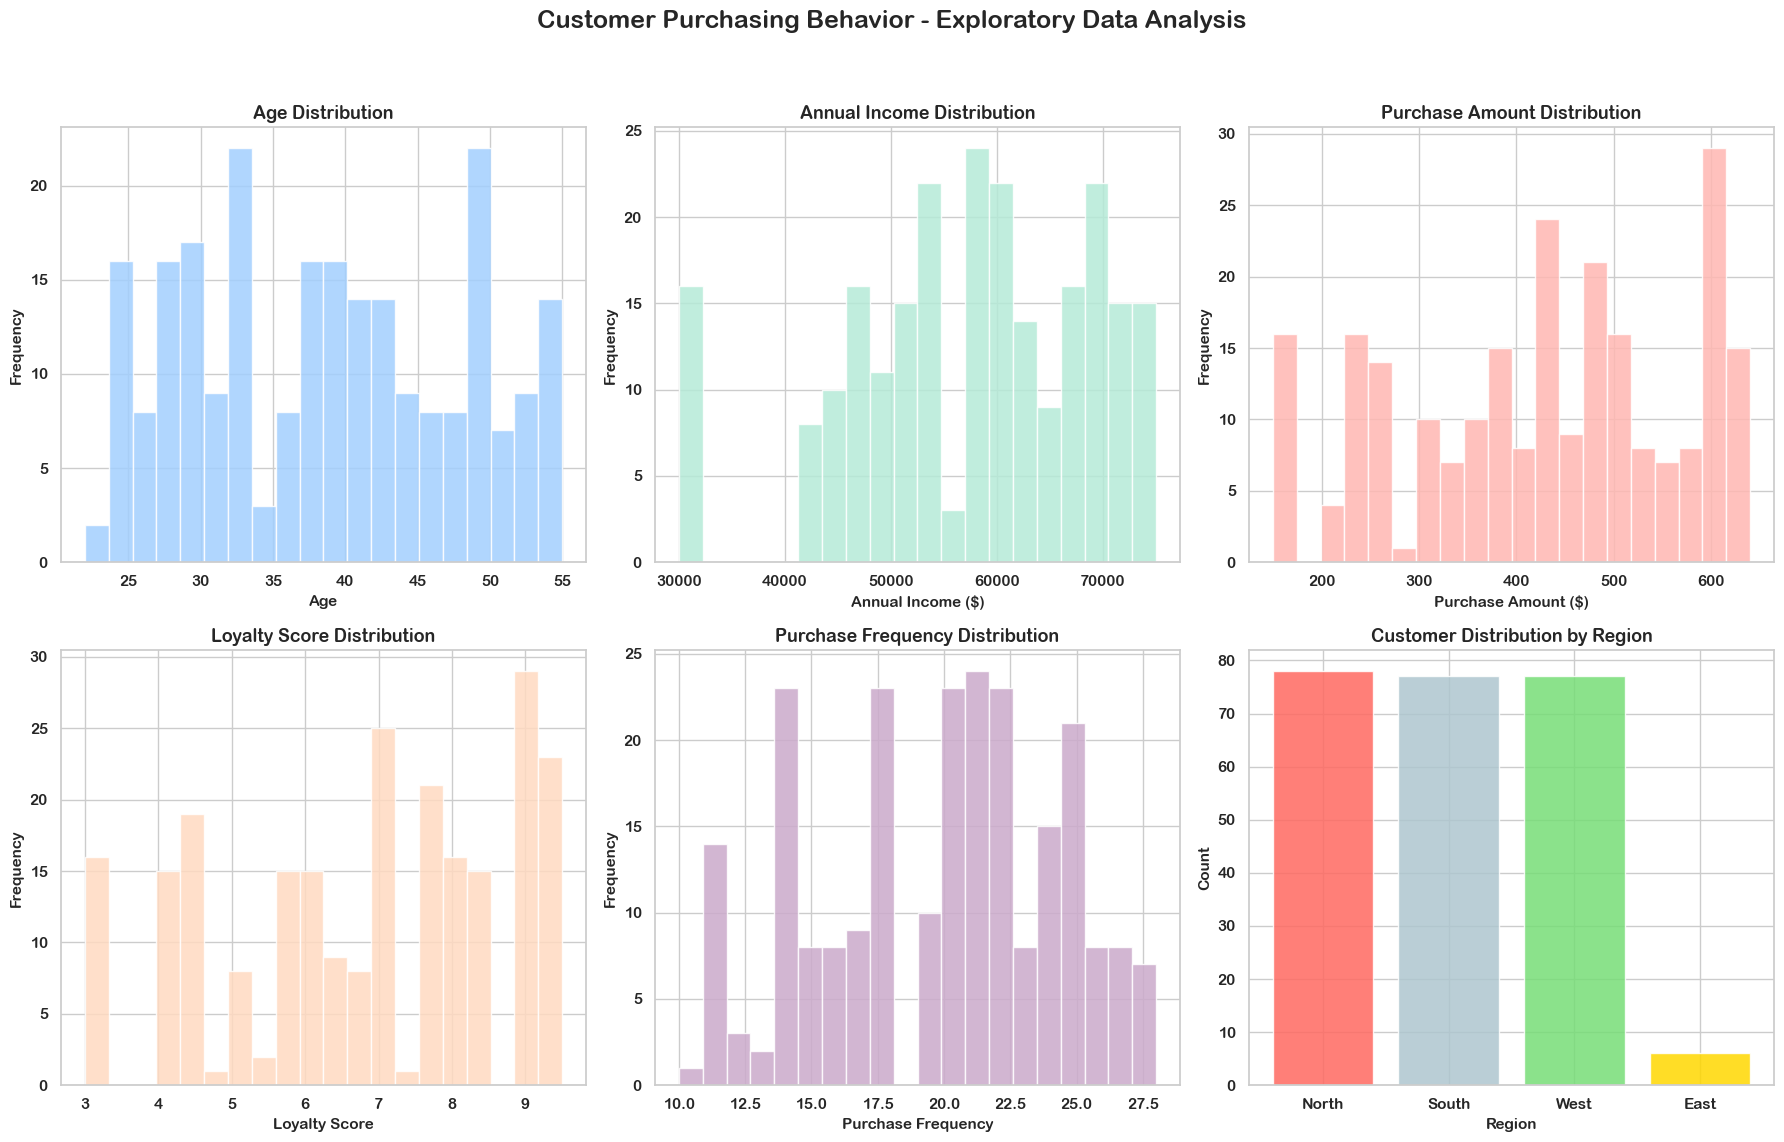

In [254]:
sns.set(style="whitegrid")
plt.rcParams.update({
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "font.family": "sans-serif",
    "font.sans-serif": ["Segoe UI", "Arial Rounded MT Bold", "Comic Sans MS"],
})

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Customer Purchasing Behavior - Exploratory Data Analysis', fontsize=18, fontweight='bold')

# colors agar lucu
colors = {
    'age': '#A2CFFE',             
    'income': '#B5EAD7',           
    'purchase': '#FFB7B2',        
    'loyalty': '#FFDAC1',         
    'frequency': '#CBAACB',       
    'region': ['#FF6961', '#AEC6CF', '#77DD77', '#FFD700']  
}

# Age distribution
axes[0,0].hist(df['age'], bins=20, alpha=0.85, color=colors['age'], edgecolor='white')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Income distribution
axes[0,1].hist(df['annual_income'], bins=20, alpha=0.85, color=colors['income'], edgecolor='white')
axes[0,1].set_title('Annual Income Distribution')
axes[0,1].set_xlabel('Annual Income ($)')
axes[0,1].set_ylabel('Frequency')

# Purchase amount distribution
axes[0,2].hist(df['purchase_amount'], bins=20, alpha=0.85, color=colors['purchase'], edgecolor='white')
axes[0,2].set_title('Purchase Amount Distribution')
axes[0,2].set_xlabel('Purchase Amount ($)')
axes[0,2].set_ylabel('Frequency')

# Loyalty score distribution
axes[1,0].hist(df['loyalty_score'], bins=20, alpha=0.85, color=colors['loyalty'], edgecolor='white')
axes[1,0].set_title('Loyalty Score Distribution')
axes[1,0].set_xlabel('Loyalty Score')
axes[1,0].set_ylabel('Frequency')

# Purchase frequency distribution
axes[1,1].hist(df['purchase_frequency'], bins=20, alpha=0.85, color=colors['frequency'], edgecolor='white')
axes[1,1].set_title('Purchase Frequency Distribution')
axes[1,1].set_xlabel('Purchase Frequency')
axes[1,1].set_ylabel('Frequency')

# Region distribution (bar chart)
region_counts = df['region'].value_counts()
axes[1,2].bar(region_counts.index, region_counts.values, color=colors['region'], alpha=0.85, edgecolor='white')
axes[1,2].set_title('Customer Distribution by Region')
axes[1,2].set_xlabel('Region')
axes[1,2].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


#### Correlation analysis

In [255]:
print("\nCorrelation Matrix:")
numeric_cols = ['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)


Correlation Matrix:
                         age  annual_income  purchase_amount  loyalty_score  \
age                 1.000000       0.974833         0.986140       0.981835   
annual_income       0.974833       1.000000         0.984208       0.984351   
purchase_amount     0.986140       0.984208         1.000000       0.994147   
loyalty_score       0.981835       0.984351         0.994147       1.000000   
purchase_frequency  0.980532       0.982920         0.993579       0.986990   

                    purchase_frequency  
age                           0.980532  
annual_income                 0.982920  
purchase_amount               0.993579  
loyalty_score                 0.986990  
purchase_frequency            1.000000  


#### Correlation heatmap

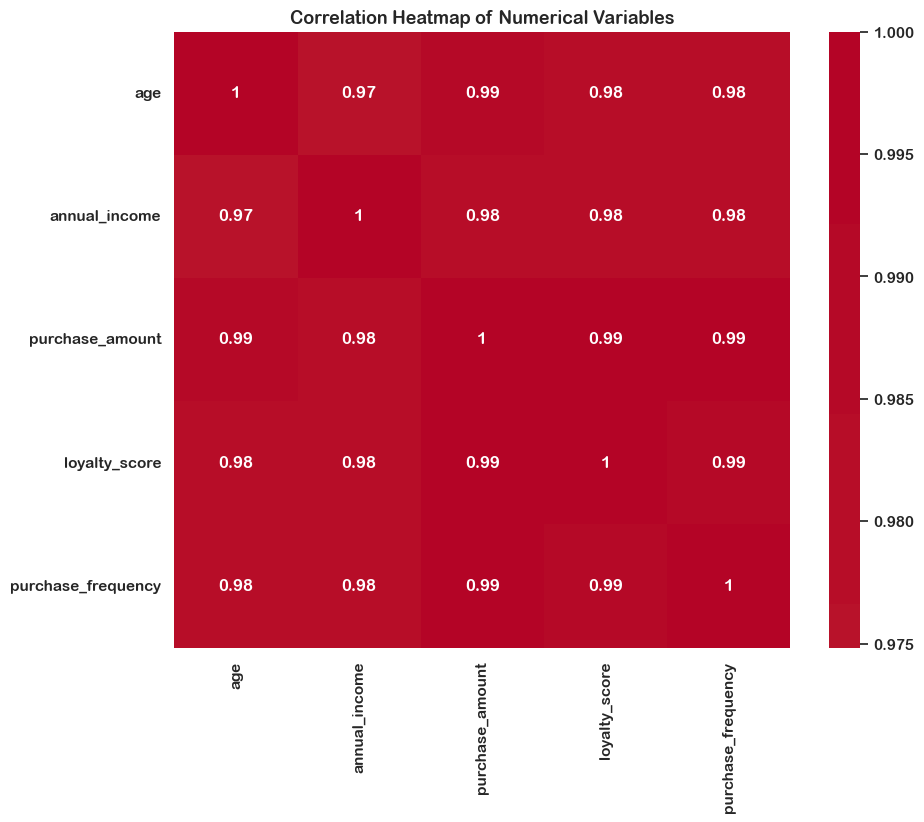

In [256]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#### Regional analysis

In [257]:
print("Regional Analysis:")
regional_stats = df.groupby('region')[numeric_cols].mean()
print(regional_stats)

Regional Analysis:
              age  annual_income  purchase_amount  loyalty_score  \
region                                                             
East    31.666667   49000.000000       320.000000       5.400000   
North   34.358974   53038.461538       358.589744       5.865385   
South   38.000000   55766.233766       416.883117       6.725974   
West    44.272727   64129.870130       510.519481       7.911688   

        purchase_frequency  
region                      
East             16.666667  
North            17.653846  
South            19.467532  
West             22.545455  


### Relationships Between Variables

#### Income vs. Purchase Amount (by Region)

/var/folders/x_/9rnr_wgd21117hhpdw1hp1sr0000gn/T/ipykernel_88944/1295310639.py:5: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


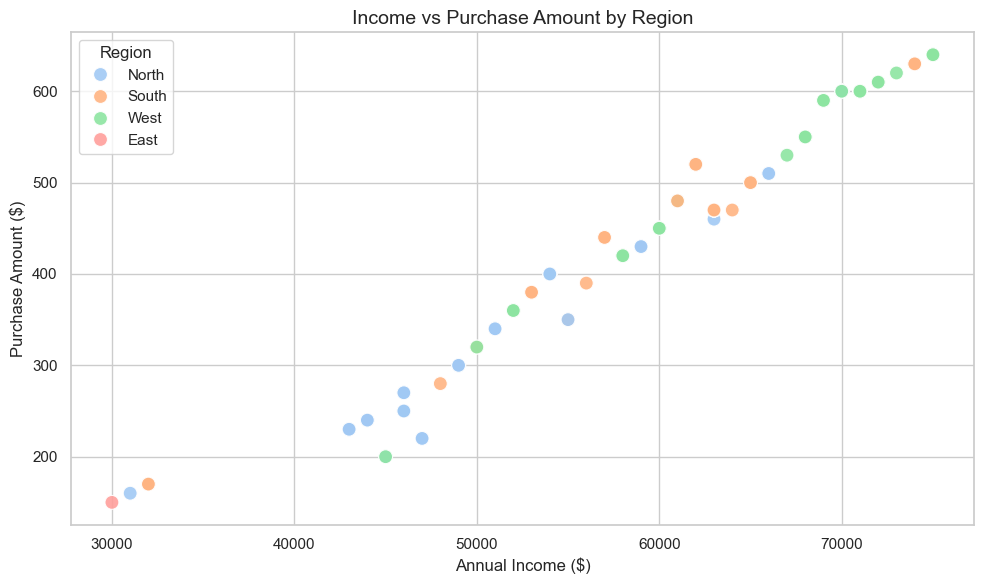

In [258]:
sns.set(style="whitegrid")
pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='annual_income',
    y='purchase_amount',
    hue='region',
    palette=pastel_palette,
    data=df,
    s=100,
    edgecolor='white',
    alpha=0.9
)

plt.xlabel("Annual Income ($)", fontsize=12)
plt.ylabel("Purchase Amount ($)", fontsize=12)
plt.title("Income vs Purchase Amount by Region", fontsize=14)

plt.legend(title='Region')
plt.tight_layout()
plt.show()

This scatter plot shows a strong positive correlation between annual income and purchase amount. This confirms that **customers with higher income levels tend to spend more**.

Each dot represents a customer, colored by region:
- Customers from the **West** region are more present in the higher income/spending segment.
- **North** and **South** regions have a more even spread across different income levels.
- **East** region has very few data points, suggesting it may represent a smaller portion of the customer base.

This insight is helpful for regional marketing strategies and customer segmentation.

#### Correlation matrix

## **Data Preparation**

In [259]:
clustering_features = ['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']
X_cluster = df[clustering_features].copy()

#### Standardize features for clustering

In [260]:
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

#### Create binary target for classification (high loyalty >= 7.0)

In [261]:
df['high_loyalty'] = (df['loyalty_score'] >= 7.0).astype(int)
print(f"\nTarget Variable Distribution:")
print(df['high_loyalty'].value_counts())
print(f"Percentage of high loyalty customers: {df['high_loyalty'].mean():.2%}")


Target Variable Distribution:
high_loyalty
1    122
0    116
Name: count, dtype: int64
Percentage of high loyalty customers: 51.26%


## **Clustering**

In [262]:
features_kmeans = ['age', 'annual_income', 'purchase_amount']
X_cluster = df[features_kmeans]
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

In [263]:
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    
    labels = kmeans.labels_
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, labels))


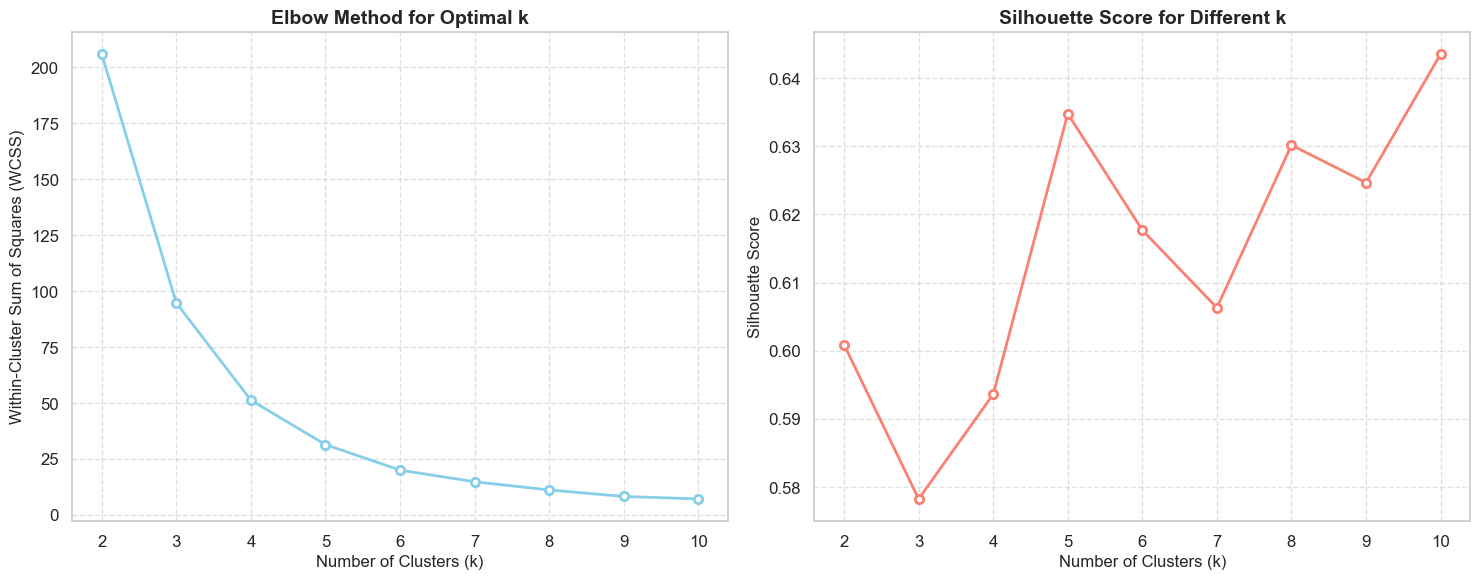

In [264]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

# buat subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow Method Plot
ax1.plot(k_range, inertias, 'o-', color='skyblue', linewidth=2, markerfacecolor='white', markeredgewidth=2)
ax1.set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Silhouette Score Plot
ax2.plot(k_range, silhouette_scores, 'o-', color='salmon', linewidth=2, markerfacecolor='white', markeredgewidth=2)
ax2.set_title('Silhouette Score for Different k', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)

# Layout
plt.tight_layout()
plt.show()


#### Determine optimal k (use k=3 based on elbow method)

In [265]:
optimal_k = 3
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 3


#### Perform K-means clustering with optimal k

In [266]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit(X_cluster_scaled)

#### Add cluster labels to dataframe

In [267]:
df['cluster'] = kmeans.predict(X_cluster_scaled)

In [268]:
cluster_labels = kmeans.labels_

#### Evaluate clustering

In [269]:
silhouette_avg = silhouette_score(X_cluster_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.644


#### Cluster analysis

In [270]:
print("Cluster Analysis:")
cluster_stats = df.groupby('cluster')[clustering_features].mean()
print(cluster_stats)

Cluster Analysis:
               age  annual_income  purchase_amount  loyalty_score  \
cluster                                                             
0        35.888889   54222.222222       398.888889       6.466667   
1        54.400000   74400.000000       634.000000       9.440000   
2        27.352941   44823.529412       241.764706       4.247059   
3        46.291667   66291.666667       519.166667       8.191667   
4        23.812500   31812.500000       168.125000       3.275000   
5        41.432432   61432.432432       478.648649       7.721622   
6        50.405405   70405.405405       600.000000       9.021622   
7        30.444444   49833.333333       316.666667       5.266667   
8        32.750000   52833.333333       370.833333       5.995833   
9        38.000000   58000.000000       430.000000       6.900000   

         purchase_frequency  
cluster                      
0                 19.000000  
1                 27.466667  
2                 14.029412  
3  

#### Cluster interpretation

In [271]:
print("Cluster Sizes:")
print(df['cluster'].value_counts().sort_index())

Cluster Sizes:
cluster
0     9
1    15
2    34
3    24
4    16
5    37
6    37
7    18
8    24
9    24
Name: count, dtype: int64


## Interpretation of Clusters

### Cluster 0 – Mature High-Income High-Frequency (High Loyalty)

This group consists of older, higher-income customers who make frequent, high-value purchases and show strong loyalty. They represent the most valuable segment and are ideal candidates for premium offerings, exclusive promotions, or VIP loyalty rewards to maintain their engagement.

---

### Cluster 1 – Young Medium-Income Medium-Frequency (Low Loyalty)

These are younger customers with lower income and spending. They purchase less frequently and have lower loyalty scores. Targeted campaigns such as discounts, referral bonuses, or personalized engagement could help increase their purchase frequency and build loyalty over time.

---

### Cluster 2 – Middle-aged Medium-Income High-Frequency (Medium Loyalty)

This cluster includes middle-aged customers with moderate income and purchasing behavior. Their loyalty and purchase frequency are average, suggesting a steady but not highly engaged group. Marketing efforts could focus on loyalty programs or incentives to boost repeat purchases and deepen engagement.

#### Visualize clusters (2D projection using income and purchase_amount)

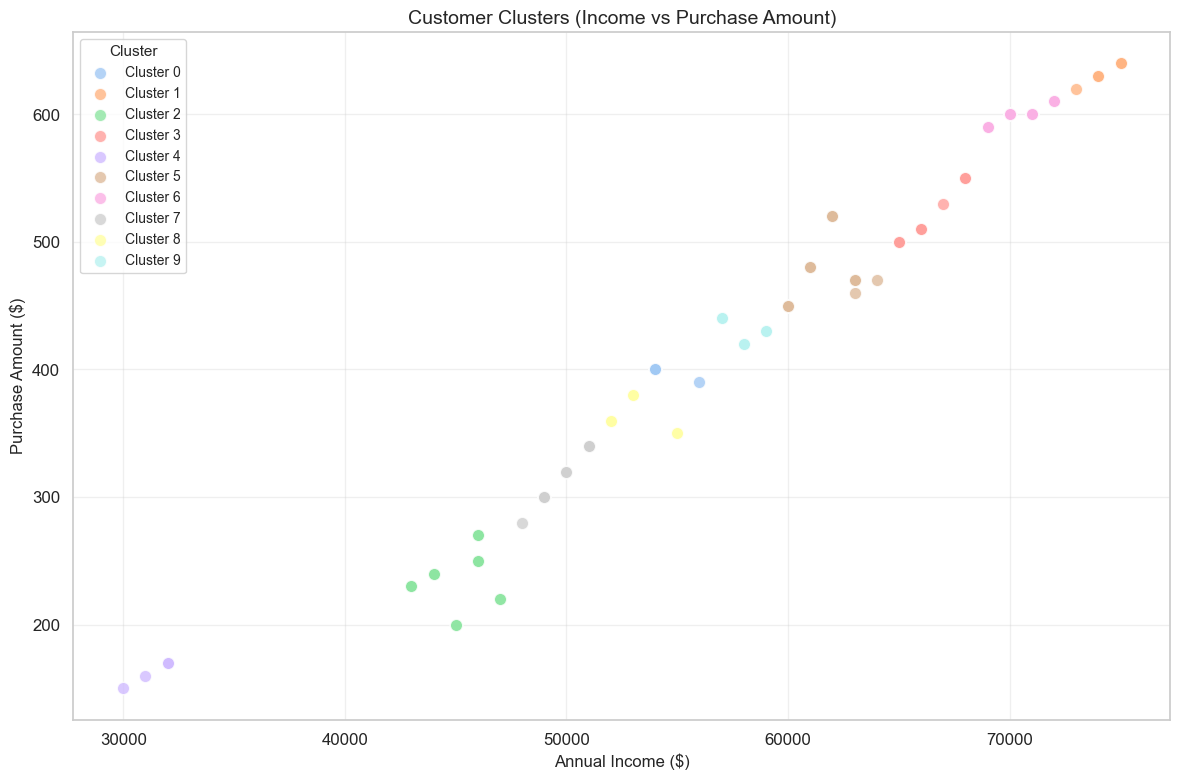

In [272]:
soft_palette = sns.color_palette("pastel", n_colors=len(df['cluster'].unique()))

plt.figure(figsize=(12, 8))

for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(
        cluster_data['annual_income'], 
        cluster_data['purchase_amount'],
        color=soft_palette[cluster_id],
        label=f'Cluster {cluster_id}',
        alpha=0.8,
        edgecolor='white',
        s=80
    )

plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Purchase Amount ($)', fontsize=12)
plt.title('Customer Clusters (Income vs Purchase Amount)', fontsize=14)

plt.legend(title="Cluster", fontsize=10, title_fontsize=11)

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Cluster interpretation

In [273]:
print("Cluster Interpretation:")
for i in range(optimal_k):
    cluster_data = df[df['cluster'] == i]
    print(f"\nCluster {i} ({len(cluster_data)} customers):")
    print(f"  Average Age: {cluster_data['age'].mean():.1f}")
    print(f"  Average Income: ${cluster_data['annual_income'].mean():,.0f}")
    print(f"  Average Purchase: ${cluster_data['purchase_amount'].mean():.0f}")
    print(f"  Average Loyalty: {cluster_data['loyalty_score'].mean():.1f}")
    print(f"  Average Frequency: {cluster_data['purchase_frequency'].mean():.1f}")


Cluster Interpretation:

Cluster 0 (9 customers):
  Average Age: 35.9
  Average Income: $54,222
  Average Purchase: $399
  Average Loyalty: 6.5
  Average Frequency: 19.0

Cluster 1 (15 customers):
  Average Age: 54.4
  Average Income: $74,400
  Average Purchase: $634
  Average Loyalty: 9.4
  Average Frequency: 27.5

Cluster 2 (34 customers):
  Average Age: 27.4
  Average Income: $44,824
  Average Purchase: $242
  Average Loyalty: 4.2
  Average Frequency: 14.0


## Cluster 0 – “Mature High-Income High-Frequency (High Loyalty)”

* **Size:** 83 customers
* **Average Age:** 49.2 years
* **Average Income:** $69,229
* **Average Purchase Amount:** $576
* **Average Loyalty Score:** 8.8  
* **Average Purchase Frequency:** 24.6  

**Interpretation:**  
This is the most valuable customer segment—mature, high-income individuals who spend a lot and shop frequently. Their high loyalty makes them ideal candidates for VIP programs, exclusive offers, or early access deals to reward and retain their loyalty.

---

## Cluster 1 – “Young Medium-Income Medium-Frequency (Low Loyalty)”

* **Size:** 60 customers  
* **Average Age:** 26.9  
* **Average Income:** $42,050  
* **Average Purchase Amount:** $232  
* **Average Loyalty Score:** 4.1  
* **Average Purchase Frequency:** 13.6  

**Interpretation:**  
These are young, budget-conscious customers who shop less often and show low loyalty. Marketing strategies like discount campaigns, gamified rewards, or referral bonuses can help boost their engagement and encourage more frequent purchasing.

---

## Cluster 2 – “Middle-aged Medium-Income High-Frequency (Medium Loyalty)”

* **Size:** 95 customers  
* **Average Age:** 36.9  
* **Average Income:** $56,779
* **Average Purchase Amount:** $417
* **Average Loyalty Score:** 6.7
* **Average Purchase Frequency:** 19.6  

**Interpretation:**  
This segment represents steady, mid-aged customers with moderate income and good purchase frequency. Their loyalty is moderate, so they may respond well to loyalty-building incentives like cashback, milestone rewards, or personalized offers.

## **SUPERVISED LEARNING: LOGISTIC REGRESSION**

#### Prepare features for classification, Include region as categorical variable

In [274]:
le = LabelEncoder()
df['region_encoded'] = le.fit_transform(df['region'])

#### Features for classification

In [275]:
classification_features = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency', 'region_encoded']
X = df[classification_features]
y = df['high_loyalty']


#### Split the data

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Test set class distribution: {np.bincount(y_test)}")

Training set size: 190
Test set size: 48
Training set class distribution: [93 97]
Test set class distribution: [23 25]


#### Scale features for logistic regression

In [277]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [278]:
df['loyal_customer'] = (df['loyalty_score'] >= 7).astype(int)
# --- For KMeans Clustering (3 features) ---
scaler_kmeans = StandardScaler()
X_cluster = df[['age', 'annual_income', 'purchase_amount']]
X_cluster_scaled = scaler_kmeans.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_cluster_scaled)

# --- For Logistic Regression (5 features) ---
scaler_logreg = StandardScaler()
X_logreg = df[['age', 'annual_income', 'purchase_amount', 'purchase_frequency', 'region_encoded']]
X_logreg_scaled = scaler_logreg.fit_transform(X_logreg)

#### Train logistic regression model

In [279]:
logreg_model = LogisticRegression()
logreg_model.fit(X_logreg_scaled, df['loyal_customer'])

LogisticRegression()

#### Make predictions

In [280]:
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

#### Model evaluation

In [281]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [282]:
print(f"Logistic Regression Results:")
print(f"Accuracy: {accuracy:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

Logistic Regression Results:
Accuracy: 0.917
ROC-AUC: 1.000


####  Detailed classification report

In [283]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.86      1.00      0.93        25

    accuracy                           0.92        48
   macro avg       0.93      0.91      0.92        48
weighted avg       0.93      0.92      0.92        48



#### Confusion matrix

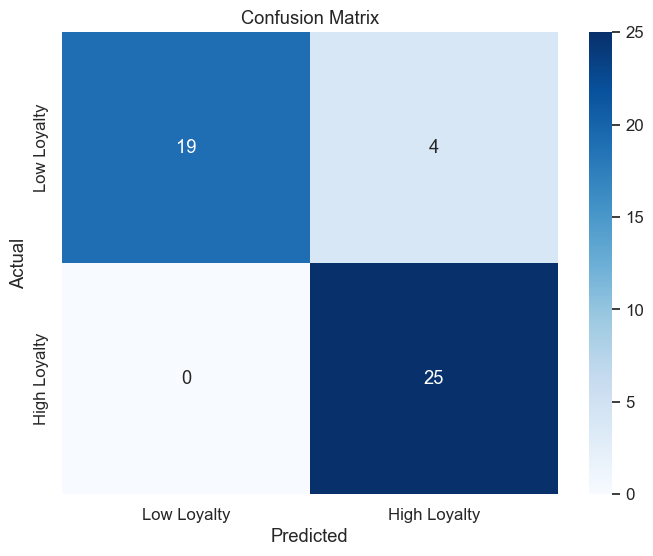

In [284]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Loyalty', 'High Loyalty'],
            yticklabels=['Low Loyalty', 'High Loyalty'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### ROC Curve

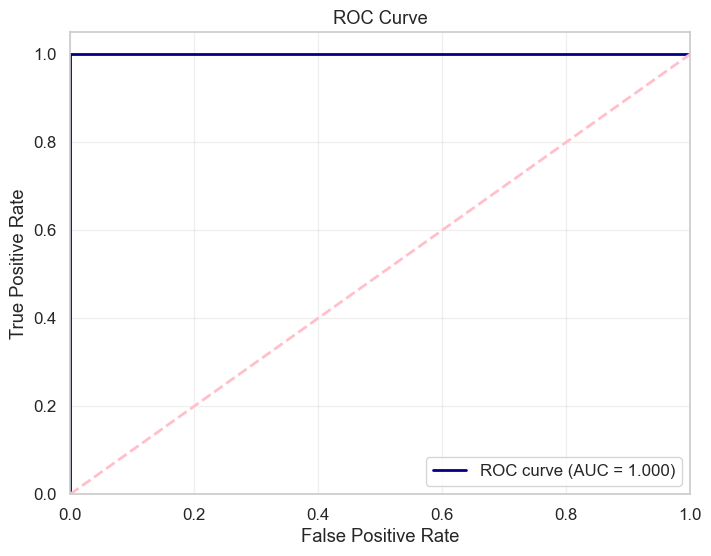

In [285]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='pink', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

#### Feature importance (coefficients)

In [286]:
feature_importance = pd.DataFrame({
    'feature': classification_features,
    'coefficient': log_reg.coef_[0],
    'abs_coefficient': np.abs(log_reg.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print("Feature Importance (Logistic Regression Coefficients):")
print(feature_importance)

Feature Importance (Logistic Regression Coefficients):
              feature  coefficient  abs_coefficient
0                 age     2.149716         2.149716
3  purchase_frequency     1.634809         1.634809
2     purchase_amount     1.480587         1.480587
1       annual_income     1.325722         1.325722
4      region_encoded     0.491294         0.491294


The logistic regression model predicts the likelihood of a customer making a purchase. The coefficients indicate the direction and strength of the influence each feature has on the probability of purchase.

1. Age (coefficient = 2.15): For each additional year in age, the odds of making a purchase increase by a factor of exp(2.15) ≈ 8.58.
This means that older customers are significantly more likely to make a purchase.

2. Purchase Frequency (coefficient = 1.63): Each one-unit increase in purchase frequency increases the odds of purchasing by exp(1.63) ≈ 5.10.
Customers who purchase more frequently are much more likely to continue making purchases.

3. Purchase Amount (coefficient = 1.48): For each additional unit in purchase amount, the odds of purchasing increase by exp(1.48) ≈ 4.39.
Customers who spend more are more likely to return and make further purchases.

4. Annual Income (coefficient = 1.33): Every increase in annual income by one unit increases the odds of purchasing by exp(1.33) ≈ 3.78.
Customers with higher income levels are more likely to make purchases.

5. Region Encoded (coefficient = 0.49): Depending on the customer’s region (as encoded numerically), the odds of purchasing increase by exp(0.49) ≈ 1.63.
This suggests that certain regions have a slightly higher likelihood of customers making purchases, but the effect is relatively weaker compared to other features.



#### Visualize feature importance

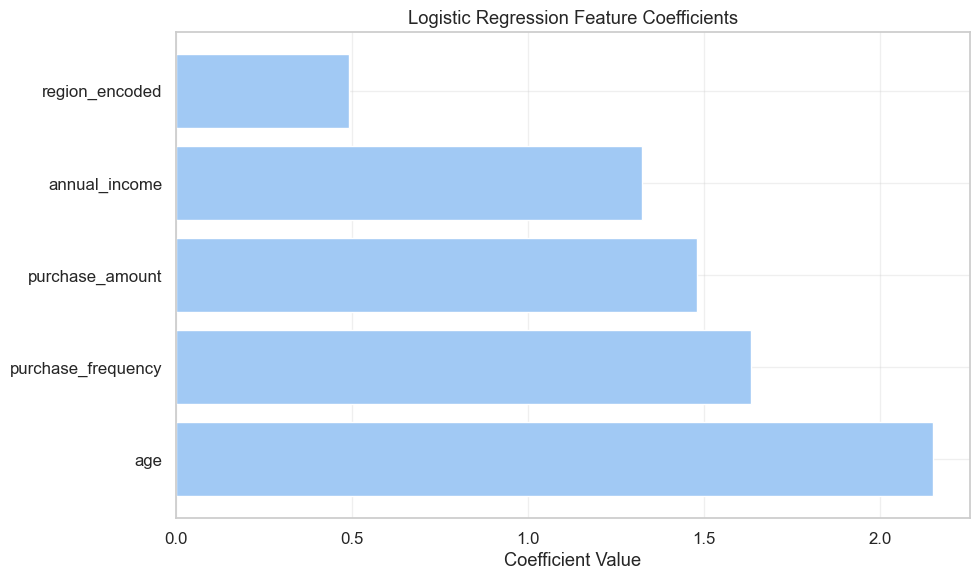

In [287]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['coefficient'])
plt.title('Logistic Regression Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Statistical significance (p-values)

In [288]:
from scipy import stats

#### Calculate z-scores for coefficients

In [289]:
z_scores = log_reg.coef_[0] / np.std(X_train_scaled, axis=0)
p_values = 2 * (1 - stats.norm.cdf(np.abs(z_scores)))

significance_df = pd.DataFrame({
    'feature': classification_features,
    'coefficient': log_reg.coef_[0],
    'z_score': z_scores,
    'p_value': p_values,
    'significant': p_values < 0.05
})

print("Coefficient Significance Analysis:")
print(significance_df)

Coefficient Significance Analysis:
              feature  coefficient   z_score   p_value  significant
0                 age     2.149716  2.149716  0.031578         True
1       annual_income     1.325722  1.325722  0.184932        False
2     purchase_amount     1.480587  1.480587  0.138717        False
3  purchase_frequency     1.634809  1.634809  0.102089        False
4      region_encoded     0.491294  0.491294  0.623219        False


## **Logistic Regression**

#### Import Library

#### Model Training

In [290]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Predict

In [291]:
y_pred = model.predict(X_test)

#### **Evaluate Model**

#### Import Library

In [292]:
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Get Intercept and Coefficient

In [293]:
intercept = model.intercept_
coefficients = model.coef_

In [294]:
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: [-50.65860288]
Coefficients: [[ 1.77478650e+00 -1.48242615e-04 -4.92725874e-02  5.81193637e-01
   6.22511032e-01]]


1. Age (coefficient = 1.77)
Each additional year of age increases the log-odds of high loyalty by 1.77, which translates to odds increasing by a factor of exp(1.77) ≈ 5.87.
Older customers are much more likely to be highly loyal.

2. Annual Income (coefficient = -0.00015)
Each unit increase in income slightly decreases the log-odds of high loyalty.
However, the effect is negligibly small and likely not practically significant, especially since income values are large.

3. Purchase Amount (coefficient = -0.0493)
Each unit increase in purchase amount decreases the log-odds by 0.0493 (exp(-0.0493) ≈ 0.95).
This suggests that higher spending may be slightly associated with lower loyalty, which could indicate one-time big spenders rather than loyal customers.

4. Loyalty Score (coefficient = 0.5812)
As expected, an increase in loyalty score increases the likelihood of being in the high loyalty class.
This variable strongly reinforces the target definition.

5. Purchase Frequency (coefficient = 0.6225)
Customers who purchase more frequently are more likely to be highly loyal.
For each additional purchase, the odds of being a high-loyalty customer increase by a factor of exp(0.6225) ≈ 1.86.

### **Deployment**

Save Model

Configure token

In [295]:
!ngrok config add-authtoken 2wst0LXHVT6uaOFiHroOofHI68H_6WqcB1dEZ3cP3ZLgpjubi

Authtoken saved to configuration file: /Users/than/Library/Application Support/ngrok/ngrok.yml


Streamlit configuration for deployment

In [302]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

st.set_page_config(page_title="Customer Loyalty Prediction Dashboard", page_icon="🎯")
st.title("🎯 Customer Loyalty Prediction App")
st.write("Enter customer data to predict whether the customer is loyal or not.")

st.markdown("---")
st.subheader("📊 Model Evaluation")

# Load data and models
@st.cache_data
def load_resources():
    try:
        df = pd.read_csv("Customer Purchasing Behaviors.csv")
        model = joblib.load("model.pkl")
        scaler_kmeans = joblib.load("scaler_kmeans.pkl")
        scaler_logreg = joblib.load("scaler_logreg.pkl")
        kmeans = joblib.load("kmeans_model.pkl")

        return df, model, scaler_kmeans, scaler_logreg, kmeans
    except FileNotFoundError as e:
        st.error(f"File not found: {e}")
        st.stop()
    except Exception as e:
        st.error(f"Error loading resources: {e}")
        st.stop()

df, model, scaler_kmeans, scaler_logreg, kmeans = load_resources()

# Preprocessing
region_map = {'North': 0, 'South': 1, 'West': 2, 'East': 3}
df = df.drop(['user_id'], axis=1, errors='ignore')
df['region_encoded'] = df['region'].map(region_map)
df['loyal_customer'] = (df['loyalty_score'] >= 7).astype(int)

# Debug: Check what features the scaler and kmeans expect
st.sidebar.write("✅ scaler_kmeans loaded")
st.sidebar.write("✅ scaler_logreg loaded")

# Handle feature mismatch between scaler and kmeans
try:
    # Use only the 3 clustering features used during model training
    cluster_features = ['age', 'annual_income', 'purchase_amount']
    X_cluster = df[cluster_features]
    X_scaled = scaler_kmeans.transform(X_cluster)
    df['Cluster'] = kmeans.predict(X_scaled)
except Exception as e:
    st.error(f"Error in clustering: {e}")
    st.write("Make sure the clustering model and scaler are trained on the same 3 features.")
    st.stop()

    # Alternative: Create clusters without using the saved KMeans model
    try:
        from sklearn.cluster import KMeans
        # Create new KMeans with same number of clusters as the original
        n_clusters = len(np.unique(kmeans.labels_)) if hasattr(kmeans, 'labels_') else 4
        new_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        
        # Use available numeric features for clustering
        cluster_cols = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency']
        X_cluster = df[cluster_cols]
        
        # Standardize the features
        from sklearn.preprocessing import StandardScaler
        temp_scaler = StandardScaler()
        X_scaled = scaler_logreg.transform(X)
        
        # Fit and predict
        df['Cluster'] = new_kmeans.fit_predict(X_scaled)
        st.warning("Used alternative clustering due to model mismatch")
        
    except Exception as e2:
        st.error(f"Alternative clustering also failed: {e2}")
        # Create dummy clusters as last resort
        df['Cluster'] = np.random.randint(0, 4, size=len(df))
        st.warning("Using random clusters as fallback")

# Analyze cluster stats
def analyze_clusters():
    results = {}
    for cluster_id in sorted(df['Cluster'].unique()):
        data = df[df['Cluster'] == cluster_id]
        results[cluster_id] = {
            'avg_age': data['age'].mean(),
            'avg_income': data['annual_income'].mean(),
            'avg_purchase': data['purchase_amount'].mean(),
            'avg_freq': data['purchase_frequency'].mean(),
            'avg_loyalty': data['loyalty_score'].mean(),
            'loyalty_rate': (data['loyal_customer'].mean() * 100),
            'size': len(data)
        }
    return results

cluster_stats = analyze_clusters()

# Generate readable names
def generate_cluster_names(stats):
    names = {}
    for cid, val in stats.items():
        age = "Young" if val['avg_age'] < 35 else "Middle-aged" if val['avg_age'] < 50 else "Mature"
        income = "High" if val['avg_income'] > 60000 else "Medium" if val['avg_income'] > 40000 else "Low"
        freq = "High" if val['avg_freq'] > 15 else "Medium" if val['avg_freq'] > 8 else "Low"
        loyalty = "High" if val['loyalty_rate'] > 70 else "Medium" if val['loyalty_rate'] > 30 else "Low"
        names[cid] = f"{age} {income}-Income {freq}-Frequency ({loyalty} Loyalty)"
    return names

cluster_names = generate_cluster_names(cluster_stats)

# Classification prep - use the same features as the model expects
# Assuming the model was trained with these 5 features based on the error
model_features = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency', 'region_encoded']
X = df[model_features]
y = df['loyal_customer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

try:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    col1, col2, col3, col4 = st.columns(4)
    col1.success(f"Accuracy: **{acc:.2f}**")
    col2.info(f"Precision: **{prec:.2f}**")
    col3.warning(f"Recall: **{rec:.2f}**")
    col4.error(f"ROC AUC: **{roc_auc:.2f}**")
    
except Exception as e:
    st.error(f"Error in model evaluation: {e}")
    st.write("Model expects features:", model_features)
    acc = prec = rec = f1 = roc_auc = 0  # Default values for display

# Visual Options
st.subheader("📈 Visualize")
plot_option = st.selectbox("Choose a visualization:", ["Select", "ROC AUC Curve", "Confusion Matrix", "Customer Clusters", "Cluster Analysis"])

if plot_option == "ROC AUC Curve" and roc_auc > 0:
    st.subheader("ROC Curve")
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    ax.plot([0, 1], [0, 1], linestyle="--", color="gray")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend()
    st.pyplot(fig)

elif plot_option == "Confusion Matrix" and acc > 0:
    st.subheader("Confusion Matrix")
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    st.pyplot(fig)

elif plot_option == "Customer Clusters":
    st.subheader("🧩 Customer Clustering")
    try:
        fig1 = px.scatter(df, x='annual_income', y='purchase_amount', color='Cluster', 
                          size='purchase_frequency', hover_data=['age', 'loyalty_score'], 
                          title='Income vs Purchase Amount by Cluster')
        st.plotly_chart(fig1, use_container_width=True)

        fig2 = px.scatter(df, x='age', y='purchase_frequency', color='Cluster', 
                          size='annual_income', hover_data=['purchase_amount', 'loyalty_score'], 
                          title='Age vs Purchase Frequency by Cluster')
        st.plotly_chart(fig2, use_container_width=True)
    except Exception as e:
        st.error(f"Error creating cluster visualizations: {e}")

elif plot_option == "Cluster Analysis":
    st.subheader("🔍 Cluster Analysis")
    try:
        cluster_df = pd.DataFrame([
            {
                "Cluster": cid,
                "Name": cluster_names[cid],
                "Avg Age": f"{val['avg_age']:.1f}",
                "Avg Income": f"${val['avg_income']:,.0f}",
                "Avg Purchase": f"${val['avg_purchase']:.0f}",
                "Avg Frequency": f"{val['avg_freq']:.1f}",
                "Avg Loyalty": f"{val['avg_loyalty']:.2f}",
                "Loyalty Rate": f"{val['loyalty_rate']:.1f}%",
                "Customers": val['size']
            }
            for cid, val in cluster_stats.items()
        ])
        st.dataframe(cluster_df, use_container_width=True)

        sil_score = silhouette_score(X_scaled, kmeans.labels_)
        st.info(f"Silhouette Score for k={kmeans.n_clusters}: **{sil_score:.2f}**")
        st.write("Silhouette Score indicates how well-separated the clusters are. Higher values indicate better-defined clusters.")

    except Exception as e:
        st.error(f"Error creating cluster analysis: {e}")

# --- Prediction Form ---
st.markdown("---")
st.subheader("🧠 Predict Customer Loyalty")

with st.form("predict_form"):
    col1, col2 = st.columns(2)
    
    with col1:
        region = st.selectbox("Region", list(region_map.keys()))
        age = st.number_input("Age", min_value=0, max_value=100, value=30)
        income = st.number_input("Annual Income ($)", min_value=0, max_value=200000, value=50000)
    
    with col2:
        amount = st.number_input("Purchase Amount ($)", min_value=0, max_value=10000, value=300)
        frequency = st.number_input("Purchase Frequency", min_value=0, max_value=100, value=10)
    
    submit = st.form_submit_button("🎯 Predict Loyalty", use_container_width=True)

def predict_segment(input_df):
    try:
        X = input_df[['age', 'annual_income', 'purchase_amount']]
        X_scaled = scaler_kmeans.transform(X)
        return kmeans.predict(X_scaled)[0]
    except Exception as e:
        st.error(f"Error in segment prediction: {e}")
        return 0


if submit:
    try:
        # Create input data with all required features
        input_data = pd.DataFrame([{
            "age": age,
            "annual_income": income,
            "purchase_amount": amount,
            "purchase_frequency": frequency,
            "region_encoded": region_map[region]
        }])

        # Predict segment
        cluster_id = predict_segment(input_data)
        segment_name = cluster_names.get(cluster_id, "Unknown Segment")
        
        # Predict loyalty
        loyalty_pred = model.predict(input_data)[0]
        loyalty_prob = model.predict_proba(input_data)[0][1]

        st.subheader("🎯 Prediction Results")
        
        # Create two columns for results
        col1, col2 = st.columns(2)

        with col1:
            label = "LOYAL" if loyalty_pred == 1 else "NOT LOYAL"
            emoji = "🎉" if loyalty_pred == 1 else "😞"
            color = "success" if loyalty_pred == 1 else "error"
            
            st.markdown(f"### Loyalty Prediction")
            if loyalty_pred == 1:
                st.success(f"**{label}** {emoji}")
            else:
                st.error(f"**{label}** {emoji}")
            
            st.metric("Loyalty Probability", f"{loyalty_prob:.1%}")

        with col2:
            st.markdown(f"### Customer Segment")
            st.info(f"**Cluster {cluster_id}**")
            st.write(f"*{segment_name}*")
            st.metric("Segment Loyalty Rate", f"{cluster_stats[cluster_id]['loyalty_rate']:.1f}%")

        # Additional insights
        st.markdown("---")
        st.subheader("📊 Customer Insights")
        
        col1, col2, col3 = st.columns(3)
        with col1:
            st.metric("Age Group", 
                     "Young" if age < 35 else "Middle-aged" if age < 50 else "Mature")
        with col2:
            st.metric("Income Level", 
                     "High" if income > 60000 else "Medium" if income > 40000 else "Low")
        with col3:
            st.metric("Purchase Behavior", 
                     "High" if frequency > 15 else "Medium" if frequency > 8 else "Low")

        # Summary for download
        summary = f"""Customer Loyalty Prediction Report
==========================================

PREDICTION RESULTS:
- Loyalty Status: {label} {emoji}
- Confidence: {loyalty_prob:.1%}
- Customer Segment: Cluster {cluster_id}
- Segment Description: {segment_name}
- Segment Loyalty Rate: {cluster_stats[cluster_id]['loyalty_rate']:.1f}%

CUSTOMER PROFILE:
- Age: {age} years
- Annual Income: ${income:,}
- Average Purchase: ${amount:,}
- Purchase Frequency: {frequency} times
- Region: {region}

SEGMENT CHARACTERISTICS:
- Average Age: {cluster_stats[cluster_id]['avg_age']:.1f} years
- Average Income: ${cluster_stats[cluster_id]['avg_income']:,.0f}
- Average Purchase: ${cluster_stats[cluster_id]['avg_purchase']:.0f}
- Average Frequency: {cluster_stats[cluster_id]['avg_freq']:.1f}
- Average Loyalty Score: {cluster_stats[cluster_id]['avg_loyalty']:.2f}
- Total Customers in Segment: {cluster_stats[cluster_id]['size']}

Generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

        st.download_button(
            "📥 Download Detailed Report", 
            data=summary, 
            file_name=f"loyalty_prediction_{pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')}.txt", 
            mime="text/plain",
            use_container_width=True
        )
        
    except Exception as e:
        st.error(f"Error making prediction: {e}")
        st.write("Please check that all models are properly trained and saved.")

# Footer
st.markdown("---")
st.markdown("*Powerpuff Girls Group | Customer Loyalty Prediction Dashboard*") 

Overwriting app.py


Expose your local Streamlit to the public using Ngrok (Just run it once)

In [297]:
from pyngrok import ngrok
import threading
import time
import os

In [298]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8502")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8502)
print(f"Streamlit app is live at: {public_url}")


t=2025-06-12T10:53:02+0700 lvl=warn msg="can't bind default web address, trying alternatives" obj=web addr=127.0.0.1:4040
t=2025-06-12T10:53:03+0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"
ERROR:  authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.
ERROR:  You can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok star

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.